In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install keras-multi-head
!pip install keras-self-attention

  Created wheel for keras-multi-head: filename=keras_multi_head-0.27.0-cp37-none-any.whl size=15611 sha256=851ee1984c3c6e6bf0ee0ba5919ac7b5642cd97960b9cda7bae2ee9db0c26c79
  Stored in directory: /root/.cache/pip/wheels/b5/b4/49/0a0c27dcb93c13af02fea254ff51d1a43a924dd4e5b7a7164d
  Created wheel for keras-self-attention: filename=keras_self_attention-0.46.0-cp37-none-any.whl size=17278 sha256=350d14443a58515f3ee4f0904e5ff9785926ca8d0343bca880834d56dc255bc9
  Stored in directory: /root/.cache/pip/wheels/d2/2e/80/fec4c05eb23c8e13b790e26d207d6e0ffe8013fad8c6bdd4d2
Successfully built keras-multi-head keras-self-attention


In [3]:
import keras 
from keras_multi_head import MultiHead
from keras_self_attention import SeqSelfAttention

import numpy as np
import os
import sys

import wave
import copy
import math

from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM, Input, Flatten, Embedding, Convolution1D, Dropout, GRU, Bidirectional
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import label_binarize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence


In [ ]:
%cd /content/drive/MyDrive/PROJECT/codes


In [5]:
from features import *
from helper import *

In [6]:
#code_path = os.path.dirname(os.path.realpath(os.getcwd()))
code_path = "/content/drive/MyDrive/PROJECT/data"
emotions_used = np.array(['ang', 'exc', 'neu', 'sad'])
data_path = code_path + "/"
sessions = ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']
framerate = 16000


In [7]:
import pickle
with open(data_path + '/'+'data_collected.pickle', 'rb') as handle:
    data2 = pickle.load(handle)

In [8]:
text = []

for ses_mod in data2:
    text.append(ses_mod['transcription'])

In [9]:
MAX_SEQUENCE_LENGTH = 500

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

token_tr_X = tokenizer.texts_to_sequences(text)
x_train_text = []

x_train_text = sequence.pad_sequences(token_tr_X, maxlen=MAX_SEQUENCE_LENGTH)

In [10]:
import codecs
EMBEDDING_DIM = 300

word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

file_loc = data_path + 'glove.42B.300d/glove.840B.300d.txt'

print (file_loc)

gembeddings_index = {}
with codecs.open(file_loc, encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        gembedding = np.asarray(values[1:], dtype='float32')
        gembeddings_index[word] = gembedding
#
f.close()
print('G Word embeddings:', len(gembeddings_index))

nb_words = len(word_index) +1
g_word_embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    gembedding_vector = gembeddings_index.get(word)
    if gembedding_vector is not None:
        g_word_embedding_matrix[i] = gembedding_vector
        
print('G Null word embeddings: %d' % np.sum(np.sum(g_word_embedding_matrix, axis=1) == 0))

Found 2736 unique tokens
/content/drive/MyDrive/FINAL THESIS PROJECT/data/glove.42B.300d/glove.840B.300d.txt
G Word embeddings: 2196017
G Null word embeddings: 100


In [11]:
Y=[]
for ses_mod in data2:
    Y.append(ses_mod['emotion'])
    
Y = label_binarize(Y,emotions_used)

Y.shape

(4936, 4)

In [12]:
counter = 0
for ses_mod in data2:
    if (ses_mod['id'][:5]=="Ses05"):
        break
    counter+=1
counter

3838

In [13]:
xtrain_tx = x_train_text[:3838]
xtest_tx = x_train_text[3838:]
ytrain_tx = Y[:3838]
ytest_tx = Y[3838:]

print(xtrain_tx.shape)
print(xtest_tx.shape)

print(ytrain_tx.shape)
print(xtest_tx.shape)

(3838, 500)
(1098, 500)
(3838, 4)
(1098, 500)


In [21]:
xtrain_tx[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [22]:
ytrain_tx[0]

array([0, 0, 1, 0])

In [25]:
ytest_tx[0]

array([0, 0, 1, 0])

#**MODEL 1**

In [ ]:
model = Sequential()
model.add(Embedding(nb_words,
                    EMBEDDING_DIM,
                    weights = [g_word_embedding_matrix],
                    input_length = MAX_SEQUENCE_LENGTH,
                    trainable = True))
    
model.add(GRU(1024, activation='relu', return_sequences=True))
model.add(GRU(512, activation='relu', return_sequences=True))
model.add(GRU(256, activation='relu', return_sequences=False))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

print("Model1 Built")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          821100    
_________________________________________________________________
gru (GRU)                    (None, 500, 1024)         4073472   
_________________________________________________________________
gru_1 (GRU)                  (None, 500, 512)          2362368   
_________________________________________________________________
gru_2 (GRU)                  (None, 256)               591360    
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1

In [ ]:
hist = model.fit(xtrain_tx, ytrain_tx, 
                 batch_size=100, epochs=50, verbose=1, shuffle = True, 
                 validation_data=(xtest_tx, ytest_tx))

Epoch 1/50
39/39 [==============================] - 120s 3s/step - loss: 1.3499 - accuracy: 0.3501 - val_loss: 1.2429 - val_accuracy: 0.4399
Epoch 2/50
39/39 [==============================] - 115s 3s/step - loss: 1.0907 - accuracy: 0.5322 - val_loss: 1.0515 - val_accuracy: 0.5874
Epoch 3/50
39/39 [==============================] - 114s 3s/step - loss: 0.8123 - accuracy: 0.6739 - val_loss: 0.9848 - val_accuracy: 0.6038
Epoch 4/50
39/39 [==============================] - 112s 3s/step - loss: 0.6367 - accuracy: 0.7488 - val_loss: 1.0355 - val_accuracy: 0.6275
Epoch 5/50
39/39 [==============================] - 116s 3s/step - loss: 0.5058 - accuracy: 0.7982 - val_loss: 1.0656 - val_accuracy: 0.6230
Epoch 6/50
39/39 [==============================] - 116s 3s/step - loss: 0.4385 - accuracy: 0.8305 - val_loss: 1.0942 - val_accuracy: 0.6230
Epoch 7/50
39/39 [==============================] - 114s 3s/step - loss: 0.3847 - accuracy: 0.8503 - val_loss: 1.3256 - val_accuracy: 0.6257
Epoch 8/50
39

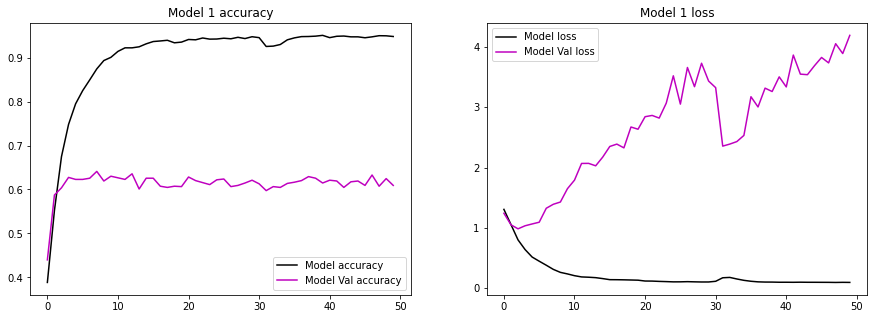

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])
ax1.plot(epochs, acc, 'k')
ax1.plot(epochs, val_acc, 'm')
ax1.set_title('Model 1 accuracy')
ax1.legend(['Model accuracy','Model Val accuracy'])

ax2.plot(epochs, loss, 'k')
ax2.plot(epochs, val_loss, 'm')
ax2.set_title('Model 1 loss')
ax2.legend(['Model loss','Model Val loss'])

plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics
import itertools

In [ ]:
loss, acc = model.evaluate(xtrain_tx, ytrain_tx,verbose = 0)
print("Training Loss {:.5f} and Training Accuracy {:.2f}%".format(loss,acc*100))

loss, acc = model.evaluate(xtest_tx, ytest_tx,verbose = 0)
print("Validation Loss {:.5f} and Validation Accuracy {:.2f}%".format(loss,acc*100))

Training Loss 0.09354 and Training Accuracy 95.18%
Validation Loss 4.18980 and Validation Accuracy 60.93%


In [ ]:
from sklearn.metrics import classification_report
# CR untuk Training Data
print("model 1")
pred = model.predict(xtrain_tx)
labels = (pred > 0.5).astype(np.int)

print(classification_report(ytrain_tx, labels, target_names = emotions_used))

model 1
              precision    recall  f1-score   support

         ang       0.97      0.97      0.97       933
         exc       0.98      0.94      0.96       742
         neu       0.98      0.91      0.95      1324
         sad       0.94      0.94      0.94       839

   micro avg       0.97      0.94      0.95      3838
   macro avg       0.97      0.94      0.96      3838
weighted avg       0.97      0.94      0.95      3838
 samples avg       0.94      0.94      0.94      3838



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# CR untuk Validation Data
print("model 1")
pred = model.predict(xtest_tx)
labels = (pred > 0.5).astype(np.int)

print(classification_report(ytest_tx, labels, target_names = emotions_used))

model 1
              precision    recall  f1-score   support

         ang       0.59      0.76      0.66       170
         exc       0.76      0.51      0.61       299
         neu       0.62      0.57      0.59       384
         sad       0.59      0.67      0.63       245

   micro avg       0.63      0.60      0.62      1098
   macro avg       0.64      0.62      0.62      1098
weighted avg       0.64      0.60      0.61      1098
 samples avg       0.60      0.60      0.60      1098



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.RdPu):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
      print('Confusion matrix, without normalization')

    cm =np.around(cm, decimals=2)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model 1
Normalized Confusion Matrix
[[0.76 0.02 0.11 0.11]
 [0.09 0.51 0.24 0.16]
 [0.15 0.09 0.57 0.18]
 [0.07 0.04 0.2  0.68]]


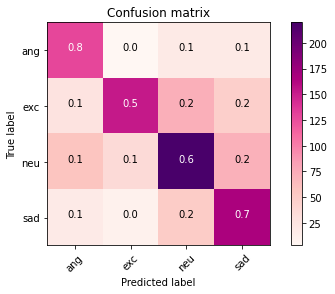

In [ ]:
import itertools
Y_pred = model.predict(xtest_tx)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(ytest_tx,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("Model 1")
plot_confusion_matrix(confusion_mtx, classes = emotions_used) 

#**MODEL 2**

In [ ]:
model2 = Sequential()
model2.add(Embedding(nb_words,
                    EMBEDDING_DIM,
                    weights = [g_word_embedding_matrix],
                    input_length = MAX_SEQUENCE_LENGTH,
                    trainable = True))
    
model2.add(GRU(256, return_sequences=True))
model2.add(SeqSelfAttention(attention_activation='relu'))
model2.add(GRU(128, return_sequences=True))
model2.add(SeqSelfAttention(attention_activation='relu'))
model2.add(GRU(128, return_sequences=False))

model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dense(4))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model2.summary()

print("Model2 Built")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          821100    
_________________________________________________________________
gru (GRU)                    (None, 500, 256)          428544    
_________________________________________________________________
seq_self_attention (SeqSelfA (None, None, 256)         16449     
_________________________________________________________________
gru_1 (GRU)                  (None, None, 128)         148224    
_________________________________________________________________
seq_self_attention_1 (SeqSel (None, None, 128)         8257      
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 256)               3

In [ ]:
hist = model2.fit(xtrain_tx, ytrain_tx, 
                 batch_size=100, epochs=50, verbose=1, shuffle = True, 
                 validation_data=(xtest_tx, ytest_tx))

Epoch 1/50
39/39 [==============================] - 39s 729ms/step - loss: 1.3719 - accuracy: 0.3255 - val_loss: 1.3657 - val_accuracy: 0.3479
Epoch 2/50
39/39 [==============================] - 28s 709ms/step - loss: 1.2969 - accuracy: 0.3977 - val_loss: 1.1957 - val_accuracy: 0.4590
Epoch 3/50
39/39 [==============================] - 28s 723ms/step - loss: 1.0274 - accuracy: 0.5704 - val_loss: 0.9543 - val_accuracy: 0.6138
Epoch 4/50
39/39 [==============================] - 29s 736ms/step - loss: 0.7809 - accuracy: 0.7010 - val_loss: 0.9619 - val_accuracy: 0.6366
Epoch 5/50
39/39 [==============================] - 29s 734ms/step - loss: 0.6388 - accuracy: 0.7554 - val_loss: 1.0156 - val_accuracy: 0.5883
Epoch 6/50
39/39 [==============================] - 28s 728ms/step - loss: 0.5684 - accuracy: 0.7733 - val_loss: 1.0650 - val_accuracy: 0.6239
Epoch 7/50
39/39 [==============================] - 28s 732ms/step - loss: 0.4734 - accuracy: 0.8145 - val_loss: 1.2087 - val_accuracy: 0.6066

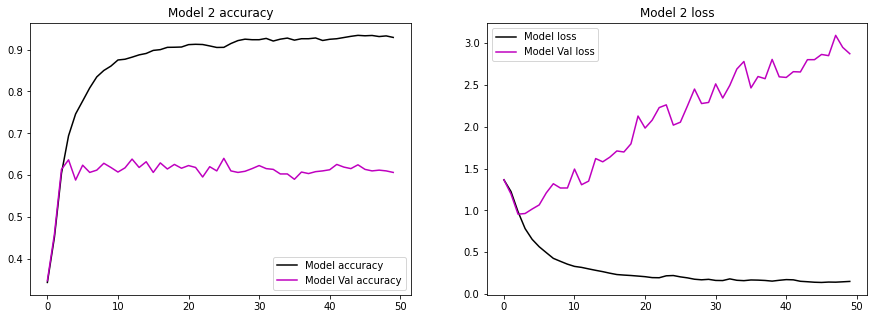

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])
ax1.plot(epochs, acc, 'k')
ax1.plot(epochs, val_acc, 'm')
ax1.set_title('Model 2 accuracy')
ax1.legend(['Model accuracy','Model Val accuracy'])

ax2.plot(epochs, loss, 'k')
ax2.plot(epochs, val_loss, 'm')
ax2.set_title('Model 2 loss')
ax2.legend(['Model loss','Model Val loss'])

plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

In [ ]:
loss, acc = model2.evaluate(xtrain_tx, ytrain_tx,verbose = 0)
print("Training Loss {:.5f} and Training Accuracy {:.2f}%".format(loss,acc*100))

loss, acc = model2.evaluate(xtest_tx, ytest_tx,verbose = 0)
print("Validation Loss {:.5f} and Validation Accuracy {:.2f}%".format(loss,acc*100))

Training Loss 0.13034 and Training Accuracy 93.93%
Validation Loss 2.87429 and Validation Accuracy 60.66%


In [ ]:
from sklearn.metrics import classification_report
# CR untuk Training Data
print("model 2")
pred = model2.predict(xtrain_tx)
labels = (pred > 0.5).astype(np.int)

print(classification_report(ytrain_tx, labels, target_names = emotions_used))

model 2
              precision    recall  f1-score   support

         ang       0.98      0.94      0.96       933
         exc       0.96      0.94      0.95       742
         neu       0.95      0.91      0.93      1324
         sad       0.95      0.90      0.93       839

   micro avg       0.96      0.92      0.94      3838
   macro avg       0.96      0.92      0.94      3838
weighted avg       0.96      0.92      0.94      3838
 samples avg       0.92      0.92      0.92      3838



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# CR untuk Validation Data
print("model 2")
pred = model2.predict(xtest_tx)
labels = (pred > 0.5).astype(np.int)

print(classification_report(ytest_tx, labels, target_names = emotions_used))

model 2
              precision    recall  f1-score   support

         ang       0.57      0.76      0.65       170
         exc       0.75      0.52      0.61       299
         neu       0.59      0.60      0.60       384
         sad       0.61      0.51      0.55       245

   micro avg       0.62      0.58      0.60      1098
   macro avg       0.63      0.60      0.61      1098
weighted avg       0.64      0.58      0.60      1098
 samples avg       0.58      0.58      0.58      1098



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
      print('Confusion matrix, without normalization')

    cm =np.around(cm, decimals=2)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model 2
Normalized Confusion Matrix
[[0.77 0.01 0.16 0.06]
 [0.08 0.53 0.29 0.11]
 [0.12 0.12 0.64 0.11]
 [0.13 0.05 0.28 0.53]]


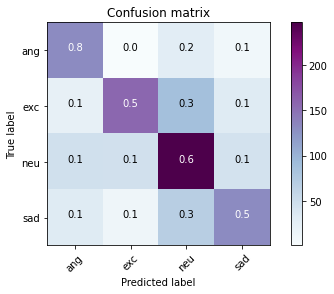

In [ ]:
import itertools
Y_pred = model2.predict(xtest_tx)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(ytest_tx,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("Model 2")
plot_confusion_matrix(confusion_mtx, classes = emotions_used) 

#**MODEL 3**

In [ ]:
model3 = Sequential()
model3.add(Embedding(nb_words,
                    EMBEDDING_DIM,
                    weights = [g_word_embedding_matrix],
                    input_length = MAX_SEQUENCE_LENGTH,
                    trainable = True))
    
model3.add(Bidirectional(GRU(1024, activation="relu", return_sequences=True)))
model3.add(Bidirectional(GRU(256, activation='relu', return_sequences=True)))
model3.add(Bidirectional(GRU(128)))

model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dense(4))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model3.summary()

print("Model3 Built")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          821100    
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 2048)         8146944   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 500, 512)          3542016   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               493056    
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1

In [ ]:
hist = model3.fit(xtrain_tx, ytrain_tx, 
                 batch_size=100, epochs=50, verbose=1, shuffle = True, 
                 validation_data=(xtest_tx, ytest_tx))

Epoch 1/50
39/39 [==============================] - 148s 3s/step - loss: 1.3413 - accuracy: 0.3427 - val_loss: 1.1133 - val_accuracy: 0.5638
Epoch 2/50
39/39 [==============================] - 136s 3s/step - loss: 0.9657 - accuracy: 0.6013 - val_loss: 0.9978 - val_accuracy: 0.5829
Epoch 3/50
39/39 [==============================] - 136s 3s/step - loss: 0.7622 - accuracy: 0.6958 - val_loss: 1.0410 - val_accuracy: 0.5984
Epoch 4/50
39/39 [==============================] - 135s 3s/step - loss: 0.5452 - accuracy: 0.7920 - val_loss: 0.9950 - val_accuracy: 0.6166
Epoch 5/50
39/39 [==============================] - 135s 3s/step - loss: 0.4362 - accuracy: 0.8344 - val_loss: 1.1959 - val_accuracy: 0.6075
Epoch 6/50
39/39 [==============================] - 135s 3s/step - loss: 0.3701 - accuracy: 0.8523 - val_loss: 1.0944 - val_accuracy: 0.6284
Epoch 7/50
39/39 [==============================] - 135s 3s/step - loss: 0.3305 - accuracy: 0.8705 - val_loss: 1.3062 - val_accuracy: 0.6120
Epoch 8/50
39

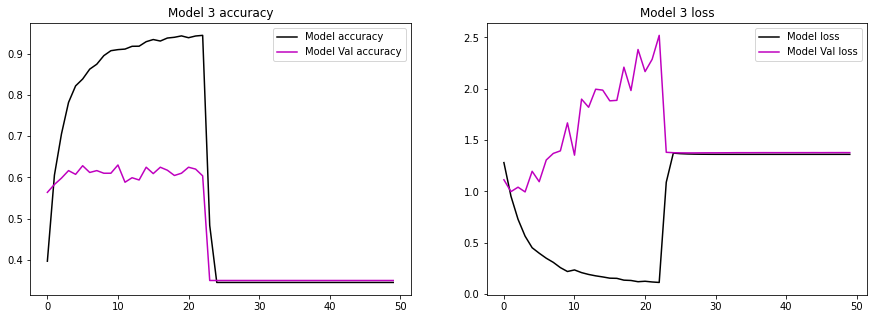

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])
ax1.plot(epochs, acc, 'k')
ax1.plot(epochs, val_acc, 'm')
ax1.set_title('Model 3 accuracy')
ax1.legend(['Model accuracy','Model Val accuracy'])

ax2.plot(epochs, loss, 'k')
ax2.plot(epochs, val_loss, 'm')
ax2.set_title('Model 3 loss')
ax2.legend(['Model loss','Model Val loss'])

plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

In [ ]:
loss, acc = model3.evaluate(xtrain_tx, ytrain_tx,verbose = 0)
print("Training Loss {:.5f} and Training Accuracy {:.2f}%".format(loss,acc*100))

loss, acc = model3.evaluate(xtest_tx, ytest_tx,verbose = 0)
print("Validation Loss {:.5f} and Validation Accuracy {:.2f}%".format(loss,acc*100))

Training Loss 1.36106 and Training Accuracy 34.50%
Validation Loss 1.37786 and Validation Accuracy 34.97%


In [ ]:
from sklearn.metrics import classification_report
# CR untuk Training Data
print("model 3")
pred = model3.predict(xtrain_tx)
labels = (pred > 0.5).astype(np.int)

print(classification_report(ytrain_tx, labels, target_names = emotions_used))

model 3
              precision    recall  f1-score   support

         ang       0.00      0.00      0.00       933
         exc       0.00      0.00      0.00       742
         neu       0.00      0.00      0.00      1324
         sad       0.00      0.00      0.00       839

   micro avg       0.00      0.00      0.00      3838
   macro avg       0.00      0.00      0.00      3838
weighted avg       0.00      0.00      0.00      3838
 samples avg       0.00      0.00      0.00      3838



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# CR untuk Validation Data
print("model 3")
pred = model3.predict(xtest_tx)
labels = (pred > 0.5).astype(np.int)

print(classification_report(ytest_tx, labels, target_names = emotions_used))

model 3
              precision    recall  f1-score   support

         ang       0.00      0.00      0.00       170
         exc       0.00      0.00      0.00       299
         neu       0.00      0.00      0.00       384
         sad       0.00      0.00      0.00       245

   micro avg       0.00      0.00      0.00      1098
   macro avg       0.00      0.00      0.00      1098
weighted avg       0.00      0.00      0.00      1098
 samples avg       0.00      0.00      0.00      1098



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
      print('Confusion matrix, without normalization')

    cm =np.around(cm, decimals=2)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model 3
Normalized Confusion Matrix
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


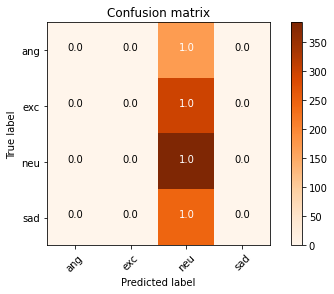

In [ ]:
import itertools
Y_pred = model3.predict(xtest_tx)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(ytest_tx,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("Model 3")
plot_confusion_matrix(confusion_mtx, classes = emotions_used) 

#**MODEL 4**

In [ ]:
model4 = Sequential()
model4.add(Embedding(nb_words,
                    EMBEDDING_DIM,
                    weights = [g_word_embedding_matrix],
                    input_length = MAX_SEQUENCE_LENGTH,
                    trainable = True))
    
model4.add(Bidirectional(GRU(128, activation="relu", return_sequences=True)))
model4.add(SeqSelfAttention(attention_activation="relu"))
model4.add(Bidirectional(GRU(128, activation='relu', return_sequences=True)))
model4.add(SeqSelfAttention(attention_activation="relu"))
model4.add(Bidirectional(GRU(128, activation='relu')))
model4.add(Dropout(0.1))

model4.add(Dense(256))
model4.add(Activation('relu'))
model4.add(Dense(4))
model4.add(Activation('softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model4.summary()

print("Model4 Built")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          821100    
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 256)          330240    
_________________________________________________________________
seq_self_attention (SeqSelfA (None, None, 256)         16449     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         296448    
_________________________________________________________________
seq_self_attention_1 (SeqSel (None, None, 256)         16449     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               296448    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [ ]:
hist = model4.fit(xtrain_tx, ytrain_tx, 
                 batch_size=100, epochs=30, verbose=1, shuffle = True, 
                 validation_data=(xtest_tx, ytest_tx))

Epoch 1/30
39/39 [==============================] - 231s 6s/step - loss: 1.3720 - accuracy: 0.3273 - val_loss: 1.3661 - val_accuracy: 0.3497
Epoch 2/30
39/39 [==============================] - 222s 6s/step - loss: 1.3465 - accuracy: 0.3542 - val_loss: 1.2978 - val_accuracy: 0.3597
Epoch 3/30
39/39 [==============================] - 225s 6s/step - loss: 1.2650 - accuracy: 0.4190 - val_loss: 1.2235 - val_accuracy: 0.4581
Epoch 4/30
39/39 [==============================] - 221s 6s/step - loss: 1.1346 - accuracy: 0.5128 - val_loss: 1.1309 - val_accuracy: 0.5191
Epoch 5/30
39/39 [==============================] - 225s 6s/step - loss: 0.9308 - accuracy: 0.6311 - val_loss: 1.1638 - val_accuracy: 0.5546
Epoch 6/30
39/39 [==============================] - 223s 6s/step - loss: 0.7692 - accuracy: 0.7200 - val_loss: 1.0466 - val_accuracy: 0.5965
Epoch 7/30
39/39 [==============================] - 221s 6s/step - loss: 0.6595 - accuracy: 0.7547 - val_loss: 1.0489 - val_accuracy: 0.6129
Epoch 8/30
39

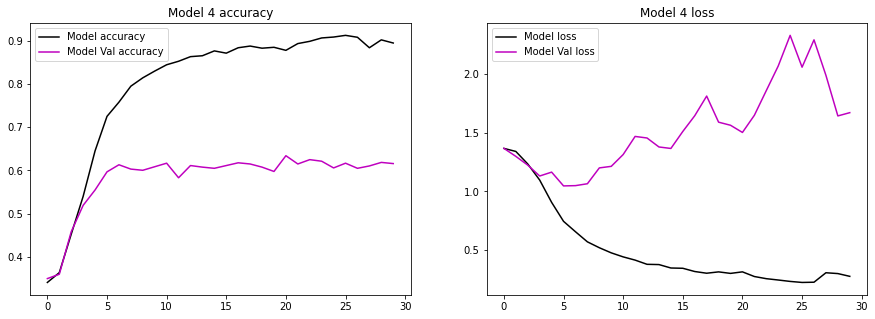

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])
ax1.plot(epochs, acc, 'k')
ax1.plot(epochs, val_acc, 'm')
ax1.set_title('Model 4 accuracy')
ax1.legend(['Model accuracy','Model Val accuracy'])

ax2.plot(epochs, loss, 'k')
ax2.plot(epochs, val_loss, 'm')
ax2.set_title('Model 4 loss')
ax2.legend(['Model loss','Model Val loss'])

plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

In [ ]:
loss, acc = model4.evaluate(xtrain_tx, ytrain_tx,verbose = 0)
print("Training Loss {:.5f} and Training Accuracy {:.2f}%".format(loss,acc*100))

loss, acc = model4.evaluate(xtest_tx, ytest_tx,verbose = 0)
print("Validation Loss {:.5f} and Validation Accuracy {:.2f}%".format(loss,acc*100))

Training Loss 0.23142 and Training Accuracy 90.93%
Validation Loss 1.66977 and Validation Accuracy 61.57%


In [ ]:
from sklearn.metrics import classification_report
# CR untuk Training Data
print("model 4")
pred = model4.predict(xtrain_tx)
labels = (pred > 0.5).astype(np.int)

print(classification_report(ytrain_tx, labels, target_names = emotions_used))

model 4
              precision    recall  f1-score   support

         ang       0.92      0.96      0.94       933
         exc       0.94      0.90      0.92       742
         neu       0.97      0.81      0.88      1324
         sad       0.89      0.95      0.92       839

   micro avg       0.93      0.89      0.91      3838
   macro avg       0.93      0.90      0.92      3838
weighted avg       0.94      0.89      0.91      3838
 samples avg       0.89      0.89      0.89      3838



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# CR untuk Validation Data
print("model 4")
pred = model4.predict(xtest_tx)
labels = (pred > 0.5).astype(np.int)

print(classification_report(ytest_tx, labels, target_names = emotions_used))

model 4
              precision    recall  f1-score   support

         ang       0.56      0.79      0.66       170
         exc       0.78      0.50      0.61       299
         neu       0.65      0.51      0.57       384
         sad       0.56      0.63      0.59       245

   micro avg       0.63      0.58      0.60      1098
   macro avg       0.64      0.61      0.61      1098
weighted avg       0.65      0.58      0.60      1098
 samples avg       0.58      0.58      0.58      1098



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
      print('Confusion matrix, without normalization')

    cm =np.around(cm, decimals=2)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model 4
Normalized Confusion Matrix
[[0.82 0.04 0.08 0.06]
 [0.07 0.54 0.22 0.16]
 [0.2  0.08 0.55 0.17]
 [0.1  0.07 0.17 0.67]]


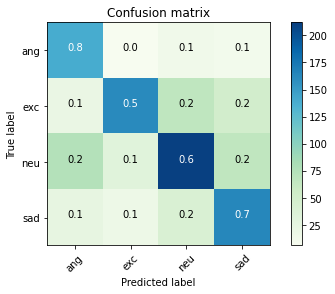

In [ ]:
import itertools
Y_pred = model4.predict(xtest_tx)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(ytest_tx,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
print("Model 4")
plot_confusion_matrix(confusion_mtx, classes = emotions_used) 